In [1]:
from utils import save_submission,load_data
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from datetime import datetime
from sys import stdout
from softmaxSKL import softmaxModel
import pprint
# I have included this file
# I wrote it in order to ease making changes
from softmaxSKL import softmaxModel
# Plotting
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Load data
data_fn = "NOISY_MNIST_SUBSETS.h5"
# Load training data
Xsmall,Ysmall = load_data(data_fn, "small_train")
Xlarge,Ylarge = load_data(data_fn, "large_train")
# Load validation data
Xval,Yval = load_data(data_fn, "val")
# Load competition data
kaggleX = load_data(data_fn, 'kaggle')

# Mean center the data
Xsmall = Xsmall - Xsmall.mean(0)
Xval = Xval - Xval.mean(0)
kaggleX = kaggleX - kaggleX.mean(0)

# Save standout to file
now = datetime.now()
stdout = open("Output/output" + str(now.hour) + str(now.minute) + ".txt", "w")

In [3]:
smallOpt = {
    'eta': 1.5, 
    'maxiter': 10000,  
    'batch_size': 4, 
    'etadrop': 0.2,
    'eta_frac': 0.7,
    'lambda_' : 0.05      
}

pprint.pprint(smallOpt, width=1)

smallModel = softmaxModel(**smallOpt)
smallModel.fit(Xsmall, Ysmall)

{'batch_size': 4,
 'eta': 1.5,
 'eta_frac': 0.7,
 'etadrop': 0.2,
 'lambda_': 0.05,
 'maxiter': 10000}


softmaxModel(batch_size=4, eta=0.06000000000000001, eta_frac=0.7, etadrop=0.2,
       lambda_=0.05, maxiter=10000)


Accuracy_Score
0.6875
             precision    recall  f1-score   support

          0       0.80      0.84      0.82       187
          1       0.62      0.96      0.75       223
          2       0.79      0.57      0.66       210
          3       0.69      0.56      0.62       183
          4       0.71      0.67      0.69       193
          5       0.68      0.39      0.49       172
          6       0.87      0.76      0.81       217
          7       0.74      0.76      0.75       233
          8       0.66      0.61      0.63       196
          9       0.47      0.67      0.56       186

avg / total       0.70      0.69      0.68      2000


 Confusion Matrix


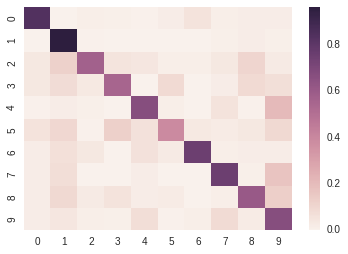

In [4]:
# Test on validation
y_true, y_pred = Yval.argmax(-1), smallModel.predict(Xval)
# Output Results
print("\nAccuracy_Score")
print(accuracy_score(y_true, y_pred))
# Classifcation Report
print(classification_report(y_true, y_pred))
print("\n Confusion Matrix")
confMatrix = confusion_matrix(y_true, y_pred)
normalizedMatrix = confMatrix/confMatrix.sum(1)
sns.heatmap(normalizedMatrix)

# Kaggle Small
kaggleSmall = smallModel.predict(kaggleX)

In [5]:
# -- training options; these are suggestions, feel free to experiment
bigOpt = {
    'eta': 1,  
    'maxiter': 10000,
    'batch_size': 50, 
    'etadrop': 0.4,
    'eta_frac': .2,  
    'lambda_' : 0.001 
}

pprint.pprint(bigOpt, width=1)

largeModel = softmaxModel(**bigOpt)
largeModel.fit(Xlarge, Ylarge)

{'batch_size': 50,
 'eta': 1,
 'eta_frac': 0.2,
 'etadrop': 0.4,
 'lambda_': 0.001,
 'maxiter': 10000}


softmaxModel(batch_size=50, eta=0.010240000000000004, eta_frac=0.2,
       etadrop=0.4, lambda_=0.001, maxiter=10000)


Accuracy_Score
0.73
             precision    recall  f1-score   support

          0       0.84      0.91      0.88       187
          1       0.56      0.97      0.71       223
          2       0.87      0.62      0.72       210
          3       0.79      0.64      0.70       183
          4       0.73      0.86      0.79       193
          5       0.64      0.65      0.65       172
          6       0.86      0.89      0.88       217
          7       0.72      0.86      0.79       233
          8       0.95      0.28      0.43       196
          9       0.67      0.53      0.59       186

avg / total       0.76      0.73      0.72      2000


 Confusion Matrix


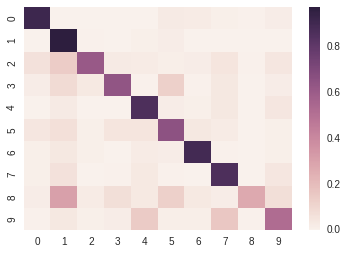

In [6]:
# Test on validation
y_true, y_pred = Yval.argmax(-1), largeModel.predict(Xval)
# Output Results
print("\nAccuracy_Score")
print(accuracy_score(y_true, y_pred))
# Classifcation Report
print(classification_report(y_true, y_pred))
print("\n Confusion Matrix")
confMatrix = confusion_matrix(y_true, y_pred)
normalizedMatrix = confMatrix/confMatrix.sum(1)
sns.heatmap(normalizedMatrix)

# Kaggle Small
kaggleLarge = largeModel.predict(kaggleX)

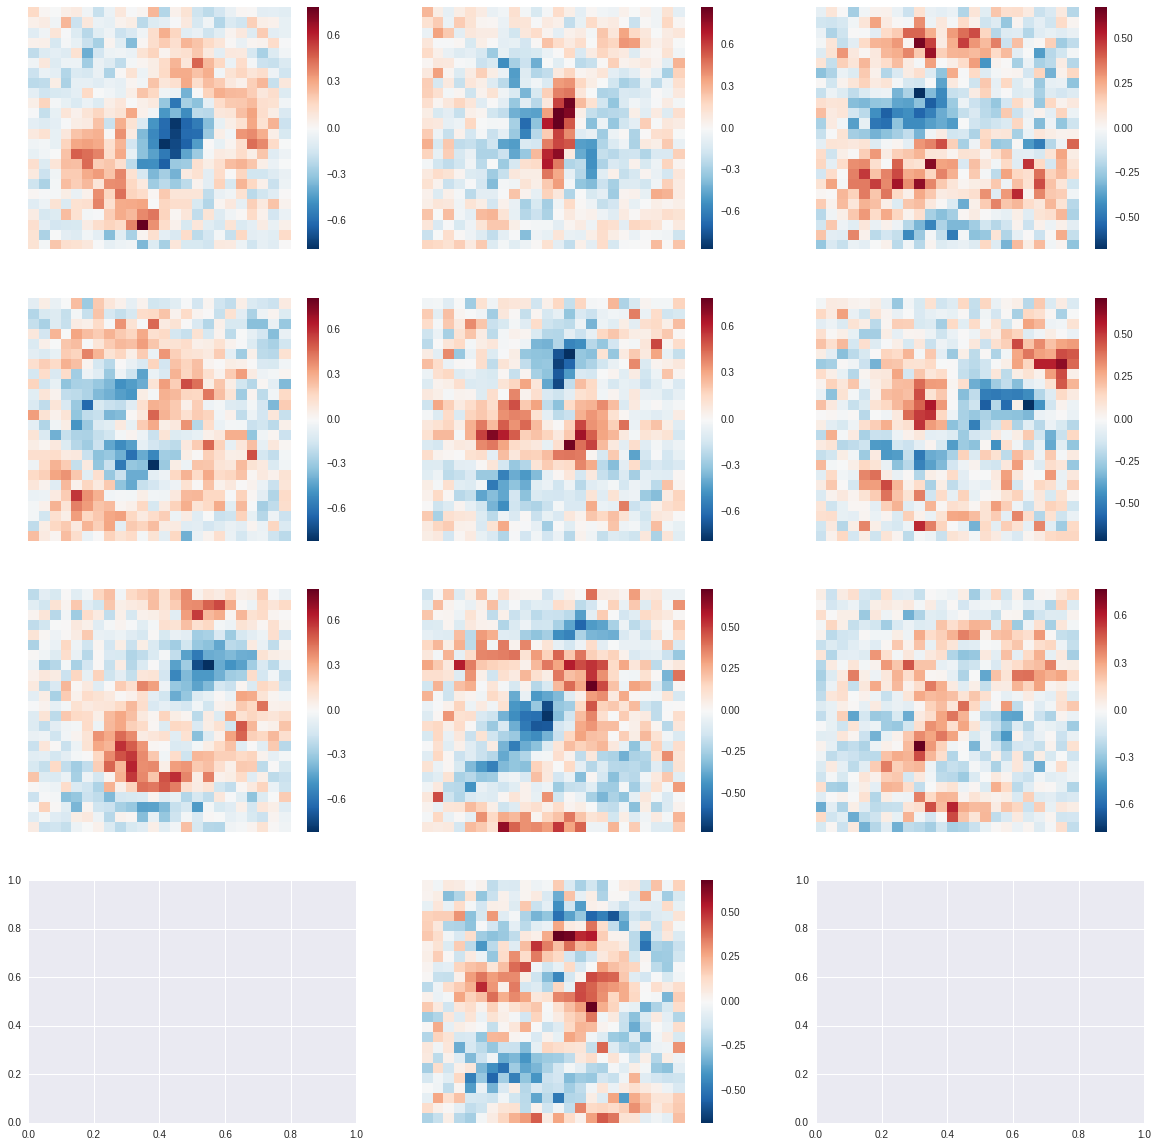

In [7]:
weights = largeModel.model["weight"]
f, axarr, = plt.subplots(4,3)
f.set_figwidth(20)
f.set_figheight(20)
sns.heatmap(weights[:,0].reshape(24,24), ax=axarr[0,0], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,1].reshape(24,24), ax=axarr[0,1], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,2].reshape(24,24), ax=axarr[0,2], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,3].reshape(24,24), ax=axarr[1,0], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,4].reshape(24,24), ax=axarr[1,1], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,5].reshape(24,24), ax=axarr[1,2], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,6].reshape(24,24), ax=axarr[2,0], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,7].reshape(24,24), ax=axarr[2,1], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,8].reshape(24,24), ax=axarr[2,2], xticklabels=False, yticklabels=False)
sns.heatmap(weights[:,9].reshape(24,24), ax=axarr[3,1], xticklabels=False, yticklabels=False)

In [8]:
# Kaggle Results

# Save results
# save_submission('submission-large.csv',  kaggleLarge)
# # Save results
# save_submission('submission-small.csv',  kaggleSmall)